<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

>Extraer datos esenciales de un conjunto de datos y mostrarlos es una parte necesaria de la ciencia de datos; de este modo, las personas pueden tomar decisiones correctas basándose en los datos. En esta tarea, extraerás algunos datos bursátiles y los mostrarás en un gráfico.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [8]:
#!pip install yfinance
#!pip install bs4
#!pip install nbformat

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go  # graph_objects de Plotly contiene funciones para crear una variedad de gráficos y diagramas.
from plotly.subplots import make_subplots  # make_subplots se utiliza para crear gráficos que combinan varios subgráficos en una sola figura.

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.

>En Python, puedes ignorar las advertencias usando el módulo de advertencias. Puede utilizar la función `filterwarnings` para filtrar o ignorar mensajes de advertencia específicos o categorías.

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # FutureWarning se refiere a advertencias que se relacionan con cambios futuros en Python que podrían afectar el código.

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**

>En esta sección, definimos la función `make_graph`. **No tienes que saber cómo funciona la función, sólo debes preocuparte por las entradas. Toma un dataframe con datos de acciones (el dataframe debe contener las columnas Fecha y Cierre), un dataframe con datos de ingresos (el dataframe debe contener las columnas Fecha e Ingresos), y el nombre de la acción.**

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    fig.show()

### Paso 1: Definición de la función

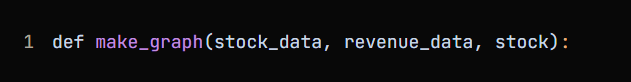

La función make_graph toma tres parámetros de entrada:

* **stock_data**: un DataFrame que contiene los datos históricos del precio de las acciones de la empresa.
* **revenue_data**: un DataFrame que contiene los datos históricos de la renta de la empresa.
* **stock**: el nombre de la empresa que se está analizando.

### Paso 2: Creación del gráfico



La función make_subplots de plotly se utiliza para crear un gráfico con dos sub-gráficos, uno para el precio de las acciones y otro para la renta. Los parámetros de entrada son:

* **rows=2**: indica que se creará un gráfico con dos filas.
* **cols=1**: indica que se creará un gráfico con una columna.
* **shared_xaxes=True**: indica que los dos sub-gráficos compartirán el eje x (fecha).
* **subplot_titles**: especifica los títulos de los sub-gráficos.
* **vertical_spacing = .3**: especifica el espacio vertical entre los sub-gráficos.

### Paso 3: Filtrado de datos

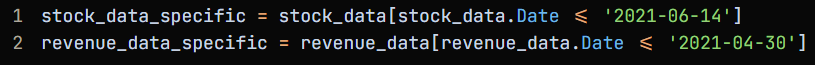

La función filtra los datos de entrada para solo considerar los datos hasta ciertas fechas específicas:

* **stock_data_specific**: se filtran los datos del precio de las acciones hasta la fecha '2021-06-14'.
* **revenue_data_specific**: se filtran los datos de la renta hasta la fecha '2021-04-30'.

### Paso 4: Adición de trazados

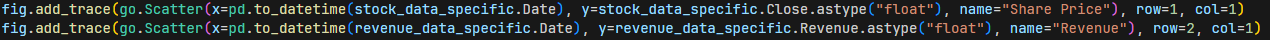

La función agrega dos trazados al gráfico:
* El primer trazado muestra el precio de las acciones en función de la fecha.
* El segundo trazado muestra la renta en función de la fecha.

Los parámetros de entrada son:
* **x**: la fecha en formato datetime.
* **y**: el valor correspondiente (precio de las acciones o renta).
* **name**: el nombre del trazado.
* **row y col**: la posición del trazado en el gráfico.

### Paso 5: Configuración del gráfico

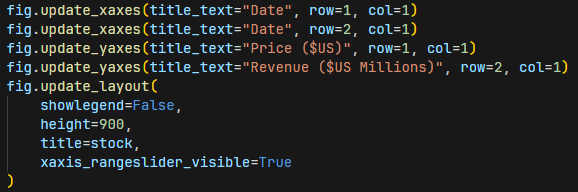

La función configura los títulos de los ejes x y y, así como el título del gráfico y la altura del gráfico. También se configura la visibilidad del rango de fechas en el eje x.

### Paso 6: Mostrar el gráfico



Finalmente, la función muestra el gráfico utilizando la función show de plotly.

-----------------------

-------------------------

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 

**Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**

>Utiliza la función make_graph que ya hemos definido. Necesitarás invocarla en las preguntas 5 y 6 para mostrar las gráficas y crear el tablero. 

>**Nota: No necesitas redefinir la función para trazar gráficas en ninguna otra parte de este cuaderno; sólo usa la función existente.**

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

>Utilizando la función `Ticker` introduzca el símbolo del ticker de la acción de la que queremos extraer datos para crear un objeto ticker. La acción es Tesla y su símbolo es `TSLA`.

In [2]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

>Usando el objeto ticker y la función `history` extraemos información bursátil y la guardamos en un dataframe llamado `tesla_data`. Establece el parámetro `period` en `«max» ` para que obtengamos la información del máximo periodo de tiempo.

In [3]:
tesla_data = tesla.history(period='max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,216.199997,219.869995,213.669998,216.270004,67443500,0.0,0.0
2024-09-10 00:00:00-04:00,220.070007,226.399994,218.639999,226.169998,78891100,0.0,0.0
2024-09-11 00:00:00-04:00,224.550003,228.470001,216.800003,228.130005,83548600,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

>**Reinicia el índice** usando la función `reset_index(inplace=True)` en el DataFrame tesla_data y muestra las cinco primeras filas del dataframe `tesla_data` usando la función `head`. Haz una captura de pantalla de los resultados y el código desde el principio de la Pregunta 1 hasta los resultados de abajo.

In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

>Utiliza la librería `requests` para descargar la página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Guarda el texto de la respuesta como una variable llamada `html_data`.

In [5]:
html = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
html_data = requests.get(html)

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content`.

>Analiza los datos html con `beautiful_soup` utilizando el analizador `html5lib` o `html.parser`. Asegúrese de utilizar el `html_data` con el parámetro de contenido como sigue `html_data.content`.

In [6]:
soup = BeautifulSoup(html_data.content,'html5lib')

print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

>Usando `BeautifulSoup` o la función `read_html` extraiga la tabla con `Tesla Revenue` y guárdela en un dataframe llamado `tesla_revenue`. El dataframe debe tener las columnas `Date` y `Revenue`.

<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Instrucciones paso a paso</summary>

```

Estas son las instrucciones paso a paso:

1. Buscar todas las tablas: Empieza buscando todas las tablas HTML de una página web usando `soup.find_all('table')`.
2. 2. Identifique la tabla relevante: a continuación, realice un bucle a través de cada tabla. Si una tabla contiene el texto «Ingresos trimestrales de Tesla», seleccione esa tabla.
3. 3. Inicializar un DataFrame: Crea un Pandas DataFrame vacío llamado `tesla_revenue` con las columnas «Date» y «Revenue».
4. Haga un bucle a través de las filas: Para cada fila de la tabla correspondiente, extraer los datos de la primera y segunda columnas (fecha e ingresos).
5. Limpie los datos de ingresos: Elimine los signos de dólar y las comas del valor de los ingresos.
6. 6. Añadir filas al DataFrame: Cree una nueva fila en el DataFrame con la fecha extraída y los valores de ingresos limpiados.
7. 7. Repita el proceso para todas las filas: Continúe este proceso para todas las filas de la tabla.

```
</details>

<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
> Note: Instead of using the deprecated pd.append() method, consider using pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>


<details><summary>Haga clic aquí si necesita ayuda para localizar la tabla</summary>

```
    
A continuación se muestra el código para aislar la tabla, ahora tendrá que bucle a través de las filas y columnas como en el laboratorio anterior
    
soup.find_all(«tbody»)[1]
    
Si desea utilizar la función read_html la tabla se encuentra en el índice 1

En este laboratorio nos centraremos en los ingresos trimestrales.
> Nota: En lugar de utilizar el método obsoleto pd.append(), considere la posibilidad de utilizar pd.concat([df, pd.DataFrame], ignore_index=True).
```

</details>

In [7]:
# Find all tables
tables = soup.find_all('table')

# Identify the Relevant Table
for table in tables:
    if table.find_all(string='Tesla Quarterly Revenue'):
        tesla_table = table

#Initialize a empty DataFrame       
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Loop Through Rows
for row in tesla_table.find_all('tr')[1:]:
    cols = row.find_all('td')
    date = cols[0].text
    revenue = cols[1].text
    tesla_newDf = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
    tesla_revenue = pd.concat([tesla_revenue, tesla_newDf], ignore_index=True)

print(tesla_revenue)



          Date  Revenue
0   2022-09-30  $21,454
1   2022-06-30  $16,934
2   2022-03-31  $18,756
3   2021-12-31  $17,719
4   2021-09-30  $13,757
5   2021-06-30  $11,958
6   2021-03-31  $10,389
7   2020-12-31  $10,744
8   2020-09-30   $8,771
9   2020-06-30   $6,036
10  2020-03-31   $5,985
11  2019-12-31   $7,384
12  2019-09-30   $6,303
13  2019-06-30   $6,350
14  2019-03-31   $4,541
15  2018-12-31   $7,226
16  2018-09-30   $6,824
17  2018-06-30   $4,002
18  2018-03-31   $3,409
19  2017-12-31   $3,288
20  2017-09-30   $2,985
21  2017-06-30   $2,790
22  2017-03-31   $2,696
23  2016-12-31   $2,285
24  2016-09-30   $2,298
25  2016-06-30   $1,270
26  2016-03-31   $1,147
27  2015-12-31   $1,214
28  2015-09-30     $937
29  2015-06-30     $955
30  2015-03-31     $940
31  2014-12-31     $957
32  2014-09-30     $852
33  2014-06-30     $769
34  2014-03-31     $621
35  2013-12-31     $615
36  2013-09-30     $431
37  2013-06-30     $405
38  2013-03-31     $562
39  2012-12-31     $306
40  2012-09-30  

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 

>Ejecute la siguiente línea para eliminar la coma y el signo de dólar de la columna `Revenue`. 

In [8]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
'''
Si no se utiliza regex=True, el método str.replace buscaría la cadena ',|\$' exactamente como está escrita. No es lo que se busca en este caso.
'''
tesla_revenue

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Paloma\AppData\Local\Temp\ipykernel_11648\3221901154.py:1: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)
C:\Users\Paloma\AppData\Local\Temp\ipykernel_11648\3221901154.py:2: SyntaxWarning: invalid escape sequence '\$'
  '''


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


Execute the following lines to remove an null or empty strings in the Revenue column.

>Ejecute las siguientes líneas para eliminar una cadena nula o vacía en la columna Ingresos.

In [9]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.

>Muestre las últimas 5 filas del marco de datos `tesla_revenue` utilizando la función `tail`. Haga una captura de pantalla de los resultados.

In [10]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

>Usando la función `Ticker` introduzca el símbolo del ticker de la acción de la que queremos extraer datos para crear un objeto ticker. La acción es GameStop y su símbolo es `GME`.

In [11]:
gamestop = yf.Ticker('GME')

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

>Usando el objeto ticker y la función `history` extraemos información bursátil y la guardamos en un dataframe llamado `gme_data`. Establece el parámetro `period` en `«max» ` para que obtengamos la información del máximo periodo de tiempo.

In [12]:
gme_data = gamestop.history(period='max')

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

>**Reinicia el índice** usando la función `reset_index(inplace=True)` en el DataFrame gme_data y muestra las cinco primeras filas del dataframe `gme_data` usando la función `head`. Haga una captura de pantalla de los resultados y el código desde el principio de la Pregunta 3 hasta los resultados de abajo.

In [13]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.

>Utiliza la librería `requests` para descargar la página web https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Guarda el texto de la respuesta como una variable llamada `html_data_2`.

In [14]:
html2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

html_data2= requests.get(html2)

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

>Analiza los datos html con `beautiful_soup` utilizando el analizador `html5lib` o `html.parser`.

In [15]:
soup2 = BeautifulSoup(html_data2.content, 'html5lib')
soup2

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue --><html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src="./G

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.

>Usando `BeautifulSoup` o la función `read_html` extraiga la tabla con `GameStop Revenue` y guárdela en un dataframe llamado `gme_revenue`. El marco de datos debe tener las columnas «Fecha» e «Ingresos». Asegúrese de que la coma y el signo de dólar se elimina de la columna `Revenue`.

> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>

<details><summary>Haga clic aquí si necesita ayuda para localizar la tabla</summary>.

```
    
A continuación se muestra el código para aislar la tabla, ahora tendrá que hacer un bucle a través de las filas y columnas como en el laboratorio anterior
    
soup.find_all(«tbody»)[1]
    
Si quieres usar la función read_html la tabla se encuentra en el índice 1


```

</details>


In [55]:
# Find all tables
gme_table = soup2.find_all('tbody')[1]

# Initialize a empty DataFrame       
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Loop Through Rows
for row in gme_table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text
    revenue = cols[1].text
    gme_newDf = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
    gme_revenue = pd.concat([gme_revenue, gme_newDf], ignore_index=True)

# Remove the comma and dollar sign from the `Revenue` column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

# Remove a null or blank string in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

print(gme_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]


<>:16: SyntaxWarning:

invalid escape sequence '\$'

<>:16: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\Paloma\AppData\Local\Temp\ipykernel_11648\2175518812.py:16: SyntaxWarning:

invalid escape sequence '\$'



In [56]:
print(gme_data['Date'].dtype)
print(gme_revenue['Date'].dtype)

datetime64[ns, America/New_York]
object


1. `gme_revenue.dropna(inplace=True)`
* **Función**: Esta línea elimina cualquier fila que contenga valores faltantes `(NaN)` en el DataFrame `gme_revenue`.
* **Parámetro `inplace=True`**: Esto significa que el DataFrame se modificará directamente sin necesidad de asignarlo a una nueva variable.
* **Contexto**: Es útil cuando no quieres mantener filas que contengan valores nulos en ninguna de las columnas.

**Antes**
| | Date        | Revenue |
|-|-------------|---------|
|0| 2021-12-31  | 5000000 |
|1| 2021-09-30  | NaN     |
|2| 2021-06-30  | 4000000 |

**Después**
| |   Date      | Revenue |
|-|-------------|---------|
|0| 2021-12-31  | 5000000 |
|2| 2021-06-30  | 4000000 |

2. `gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]`
* **Función**: Aquí se está filtrando el DataFrame para eliminar filas donde la columna Revenue contiene una cadena vacía ("").
* **Condición**: gme_revenue['Revenue'] != "" devuelve una serie booleana donde se evalúa si cada valor de la columna Revenue es diferente de "".
    * Las filas donde esta condición sea True (es decir, donde Revenue no es una cadena vacía) serán conservadas.
* **Asignación**: El DataFrame filtrado (sin las filas donde Revenue es una cadena vacía) se asigna de nuevo a la variable gme_revenue.

**Antes**
| |   Date      | Revenue |
|-|-------------|---------|
|0| 2021-12-31  | 5000000 |
|1| 2021-09-30  |         |
|2| 2021-06-30  | 4000000 |

**Después**
| |   Date      | Revenue |
|-|-------------|---------|
|0| 2021-12-31  | 5000000 |
|2| 2021-06-30  | 4000000 |

In [42]:
# El siguiente código no funciona bien en el gráfico. Tal vez no se pueda combinar una parte con BeautifulSoup (gme_data) y la otra con Pandas (gme_revenue):

# tables2 = pd.read_html(html_data2.content)
# tables2
# gme_revenue = tables2[0]
# gme_revenue.columns = ['Date', 'Revenue']
# gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.

>Muestre las últimas cinco filas del marco de datos `gme_revenue` utilizando la función `tail`. Haga una captura de pantalla de los resultados.

In [59]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

>Utilice la función `make_graph` para representar gráficamente los datos de Tesla Stock, también proporcionar un título para el gráfico. Tenga en cuenta que el gráfico sólo mostrará datos hasta junio de 2021.

<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


<details><summary>Sugerencia</summary>

```

Basta con invocar la función make_graph con el parámetro requerido para imprimir los gráficos.La estructura para llamar a la función `make_graph` es `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>

In [36]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


<details><summary>Sugerencia</summary>

```

Solo necesita invocar la función make_graph con el parámetro requerido para imprimir los gráficos. La estructura para llamar a la función `make_graph` es `make_graph(gme_data, gme_revenue, 'GameStop').

```
    
</details>

In [58]:
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

```toggle ## Change Log
```
```toggle | Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
```
```toggle | ----------------- | ------- | ------------- | ------------------------- |
```
```toggle | 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
```
```toggle | 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
```
```toggle | 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |
```
